In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.model_selection import GridSearchCV

In [3]:
import pickle

In [4]:
from sklearn import metrics

In [5]:
from sklearn.model_selection import train_test_split

In [27]:
df = pd.read_csv("Stats.csv",index_col = 0)

In [28]:
df

,Rating,Accuracy,Shot fired,Hits,Deaths,DMG_Get
0,70.8,20.10%,3509,704,40,236
1,55.8,15.80%,4771,753,54,308
2,47.6,16.70%,3526,589,59,411
3,47.5,15.20%,3184,484,42,282
4,24.7,10.30%,3481,359,66,285
...,...,...,...,...,...,...
710,40.3,11.10%,2749,306,28,591
711,39.8,13.90%,2768,385,50,549
712,30.1,8.40%,2608,219,34,442
713,25.7,8.30%,2275,189,36,583


In [29]:
#change string with % to float
def proc(acc):
    acc = acc[:-1]
    return acc

In [30]:
df["Accuracy"] = df["Accuracy"].apply(proc).apply(float)

In [31]:
df.head(2)

,Rating,Accuracy,Shot fired,Hits,Deaths,DMG_Get
0,70.8,20.1,3509,704,40,236
1,55.8,15.8,4771,753,54,308


In [32]:
#Plot with outliers!!!

# Delete Outliers

In [33]:
df = df[df["Rating"] <100]

In [34]:
X = df.drop("Rating", axis = 1)
y = df["Rating"]

In [35]:
#Statistics needed to check the model in the application
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=110)
X_test.to_csv("X_test.csv", encoding="utf-8")
y_test.to_csv("y_test.csv", encoding="utf-8")

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=110)

# Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression

In [271]:
lm = LinearRegression()

In [272]:
lm.fit(X_train,y_train)

LinearRegression()

In [273]:
predictions = lm.predict(X_test)

In [274]:
df.columns

Index(['Rating', 'Accuracy', 'Shot fired', 'Hits', 'Deaths', 'DMG_Get'], dtype='object')

In [275]:
lm.coef_

array([ 2.62480278e+00,  6.36459811e-03,  2.30054740e-02, -5.18296886e-01,
       -5.16812415e-04])

In [276]:
predictions = lm.predict(X_test)

In [277]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 8.035449273023929
MSE: 96.93007556421857
RMSE: 9.845307286429335


In [278]:
with open ("linear_regression.pkl", "wb") as file:
    pickle.dump(lm,file)

# Linear Regression(Cheated model)

In [43]:
lm_3 = LinearRegression()

In [44]:
X_train_3 = X_train.drop(["Shot fired","Deaths"], axis = 1)

In [45]:
X_test_3 = X_test.drop(["Shot fired","Deaths"], axis = 1)

In [46]:
X_train_3

,Accuracy,Hits,DMG_Get
400,19.1,243,311
494,12.6,210,691
108,11.8,361,486
594,15.6,596,378
231,22.2,368,339
...,...,...,...
462,11.3,106,332
409,15.2,275,504
293,14.5,235,342
64,13.9,59,787


In [47]:
lm_3.fit(X_train_3,y_train)

LinearRegression()

In [48]:
predictions = lm_3.predict(X_test_3)

In [50]:
lm_3.coef_

array([ 2.08672028,  0.03754664, -0.01056591])

In [51]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 8.829683567406486
MSE: 123.98187144921025
RMSE: 11.13471469994675


# Random Forest

In [54]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor

In [55]:
grid_params = {"n_estimators": [1000,2000,4000],
              "max_depth": [4,5,6,7,8,9,10],
               "min_impurity_decrease": [0.01,0.02,0.05],
               "max_features":[2,3,4]
              }

In [20]:
grid_forest = GridSearchCV(RandomForestRegressor, param_grid = grid_params)

In [21]:
#Long Time !!!

In [22]:
#grid_forest.fit(X_train,y_train)

In [28]:
#grid_forest.best_params_

In [29]:
#preds = grid_forest.predict(X_test)

In [30]:
#print('MAE:', metrics.mean_absolute_error(y_test, preds))
#print('MSE:', metrics.mean_squared_error(y_test, preds))
#print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))

In [31]:
#Best model

In [112]:
forest = RandomForestRegressor(n_estimators= 1000, max_depth=10,criterion="mse", max_features=3)

In [113]:
forest.fit(X_train, y_train)

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


RandomForestRegressor(criterion='mse', max_depth=10, max_features=3,
                      n_estimators=1000)

In [114]:
preds = forest.predict(X_test)

In [115]:
print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))

MAE: 6.709903216396303
MSE: 79.174152066703
RMSE: 8.897985843251439


In [107]:
with open ("forest.pkl", "wb") as file:
    pickle.dump(forest,file)

# Random Forest(Cheated Model)


In [120]:
forest_3 = RandomForestRegressor(n_estimators= 3000, max_depth=3,criterion="mse", max_features=2)

In [121]:
forest_3.fit(X_train_3,y_train)

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


RandomForestRegressor(criterion='mse', max_depth=3, max_features=2,
                      n_estimators=3000)

In [122]:
preds = forest_3.predict(X_test_3)

In [123]:
print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))

MAE: 8.943741756105142
MSE: 129.94269787189188
RMSE: 11.399241109472678


# Gradient Boost

In [124]:
from sklearn.ensemble import GradientBoostingRegressor

In [125]:
gradient = GradientBoostingRegressor()

In [134]:
param_grid_gradient = {"n_estimators": [100,150,200],
             "learning_rate": [0.02,0.03,0.05,0.1],
             "max_depth": [3,4],
                "criterion" : ["squared_error"],
                      "alpha":[0.5,0.7,0.8,0.9]}

In [135]:
grid_gradient = GridSearchCV(gradient,param_grid=param_grid_gradient)

In [136]:
grid_gradient.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'alpha': [0.5, 0.7, 0.8, 0.9],
                         'criterion': ['squared_error'],
                         'learning_rate': [0.02, 0.03, 0.05, 0.1],
                         'max_depth': [3, 4], 'n_estimators': [100, 150, 200]})

In [137]:
grid_gradient.best_params_

{'alpha': 0.7,
 'criterion': 'squared_error',
 'learning_rate': 0.05,
 'max_depth': 3,
 'n_estimators': 150}

In [138]:
grid_gradient.best_estimator_.feature_importances_

array([0.42800216, 0.01452859, 0.31386107, 0.23718257, 0.00642561])

In [139]:
pred_grid_gradient = grid_gradient.predict(X_test)

In [140]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_grid_gradient))
print('MSE:', metrics.mean_squared_error(y_test, pred_grid_gradient))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_grid_gradient)))

MAE: 6.5640089853285115
MSE: 75.16307011595363
RMSE: 8.669663783328257


In [55]:
len(pred_grid_gradient)

143

In [144]:
with open ("gradient.pkl", "wb") as file:
    pickle.dump(grid_gradient,file)

# Gradient Boost (Cheated)

In [157]:
gradient_3 = GradientBoostingRegressor()

In [158]:
grid_gradient_3 = GridSearchCV(gradient_3,param_grid=param_grid_gradient)

In [159]:
grid_gradient_3.fit(X_train_3,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'alpha': [0.5, 0.7, 0.8, 0.9],
                         'criterion': ['squared_error'],
                         'learning_rate': [0.02, 0.03, 0.05, 0.1],
                         'max_depth': [3, 4], 'n_estimators': [100, 150, 200]})

In [160]:
grid_gradient_3.best_params_

{'alpha': 0.9,
 'criterion': 'squared_error',
 'learning_rate': 0.02,
 'max_depth': 3,
 'n_estimators': 150}

In [161]:
grid_gradient_3.best_estimator_.feature_importances_

array([0.65854009, 0.30851743, 0.03294248])

In [162]:
pred_grid_gradient_3 = grid_gradient_3.predict(X_test_3)

In [163]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_grid_gradient_3))
print('MSE:', metrics.mean_squared_error(y_test, pred_grid_gradient_3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_grid_gradient_3)))

MAE: 9.111594914079854
MSE: 141.72211478303086
RMSE: 11.904709773154105


# KNN

In [165]:
from sklearn.neighbors import KNeighborsRegressor

In [166]:
KNN = KNeighborsRegressor()

In [167]:
param_grid = {
    "n_neighbors": [2,3,4,5,6,7,8,9,10],
    "weights": ["uniform","distance"],
    "leaf_size": [10,20,30,40,50],
    "p": [1,2],
    "metric" :["cityblock","euclidean","l1","l2","manhattan"]
       
}

In [168]:
Grid_KNN = GridSearchCV(KNN, param_grid=param_grid)

In [169]:
Grid_KNN.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'leaf_size': [10, 20, 30, 40, 50],
                         'metric': ['cityblock', 'euclidean', 'l1', 'l2',
                                    'manhattan'],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [170]:
Grid_KNN.best_params_

{'leaf_size': 10,
 'metric': 'cityblock',
 'n_neighbors': 6,
 'p': 1,
 'weights': 'distance'}

In [171]:
preds = Grid_KNN.predict(X_test)

In [172]:
print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))

MAE: 10.996378977836683
MSE: 201.0844475050292
RMSE: 14.180424799879205


In [66]:
with open ("KNN.pkl", "wb") as file:
    pickle.dump(Grid_KNN,file)

# KNN (Cheated Model)

In [173]:
KNN_3 = KNeighborsRegressor()

In [174]:
Grid_KNN_3 = GridSearchCV(KNN_3, param_grid=param_grid)

In [175]:
Grid_KNN_3.fit(X_train_3,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'leaf_size': [10, 20, 30, 40, 50],
                         'metric': ['cityblock', 'euclidean', 'l1', 'l2',
                                    'manhattan'],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [176]:
Grid_KNN.best_params_

{'leaf_size': 10,
 'metric': 'cityblock',
 'n_neighbors': 6,
 'p': 1,
 'weights': 'distance'}

In [182]:
preds = Grid_KNN_3.predict(X_test_3)

In [183]:
print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))

MAE: 11.71995983030135
MSE: 222.5446801694082
RMSE: 14.917931497677827


# SVR

In [59]:
from sklearn.svm import LinearSVR

In [60]:
SVR = LinearSVR(random_state=110)

In [61]:
grid_params = {
    "epsilon":[0.01,0.05,0.1,0.2,0,5],
    "C":[0.5,1,2,3,5]
    
    
   
}

In [62]:
Grid_SVR = GridSearchCV(SVR, param_grid = grid_params)

In [63]:
Grid_SVR.fit(X_train,y_train)

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-package

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-package

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-package

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



GridSearchCV(estimator=LinearSVR(random_state=110),
             param_grid={'C': [0.5, 1, 2, 3, 5],
                         'epsilon': [0.01, 0.05, 0.1, 0.2, 0, 5]})

In [64]:
preds = Grid_SVR.predict(X_test)

In [65]:
Grid_SVR.best_params_

{'C': 0.5, 'epsilon': 5}

In [66]:
SVR = LinearSVR(max_iter=500000, C = 1, epsilon=1,random_state=110,intercept_scaling = 1)

In [67]:
SVR.fit(X_train,y_train)

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



LinearSVR(C=1, epsilon=1, intercept_scaling=1, max_iter=500000,
          random_state=110)

In [68]:
preds = SVR.predict(X_test)

In [69]:
print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))

MAE: 6.840010876953257
MSE: 90.08318260464821
RMSE: 9.491216076175288


In [70]:
with open ("SVRLinear.pkl", "wb") as file:
    pickle.dump(SVR,file)

# Plots with Plotly

In [16]:
from plotly import __version__
%matplotlib inline
print(__version__) # requires version >= 1.9.0

5.9.0


In [17]:
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [20]:
import chart_studio.plotly as py

In [79]:
import plotly.express as px

In [21]:
init_notebook_mode(connected=True)

In [22]:
cf.go_offline()

In [19]:
#df["Rating"].iplot()

In [24]:
df_test = pd.DataFrame(np.random.randn(100,4),columns = "A B C D".split())

In [25]:
df_test

,A,B,C,D
0,-0.899232,-0.545343,-0.596996,0.716387
1,-0.690796,0.399698,1.072031,-0.469865
2,-1.626388,-0.884061,-1.296991,0.042223
3,0.369847,2.005164,-1.459319,0.230891
4,-0.395901,-0.336159,-0.065559,-0.845108
...,...,...,...,...
95,0.088144,0.476583,0.096562,-0.450102
96,-2.489677,1.660995,-1.033324,-0.230228
97,-1.963892,-0.383451,0.991960,0.170413
98,0.056362,-1.679198,1.963646,1.243113


In [ ]:
iplot(data = y_test)

In [ ]:
fig = df.iloc[:100].iplot(kind='scatter', x = "y_test",y = "Accuracy", size = 10,mode='markers', color = "Red")
fig.add_bar(x=, y=[2,1,3])

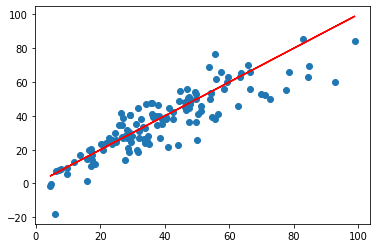

In [281]:
fig = plt.figure()
scater = plt.scatter(y_test,preds)
         #Perfect predictions
line = plt.plot(y_test,y_test,'r')